## Sonar data classification using MLP classifier (sklearn)

In [114]:
import numpy as np
from csv import reader
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import random 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### load and prepare data from csv file

In [115]:

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
print("size of sonar dataset = {}".format(np.asarray(dataset).shape))
#type(dataset)

size of sonar dataset = (208, 61)


### Prepare Train and test sets. 

In [116]:

random.shuffle(dataset)
test_size=int(len(dataset)*.20)   # 40% data in test set, 60% in training set
print("test_size = {}".format(test_size))
dataset_test = dataset[len(dataset)-test_size:]
dataset_train = dataset[0:len(dataset)-test_size]


Xtrain=list()
ytrain=list()
for i in range(len(dataset_train)):
    row=list(dataset_train[i])
    ytrain.append(row[-1:])    
    del row[-1:]
    Xtrain.append(row)
    
Xtest=list()
ytest=list()
for i in range(len(dataset_test)):
    row=list(dataset_test[i])
    ytest.append(row[-1:])    
    del row[-1:]
    Xtest.append(row)
    
print("nb_data_test = {0}, nb_data_train = {1}".format(len(dataset_test),len(dataset_train)))
print("dimensions of Xtrain = {0}, and of ytrain ={1}".format(np.asarray(Xtrain).shape, np.asarray(ytrain).shape))
print("dimensions of Xtest = {0}, and of ytest ={1}".format(np.asarray(Xtest).shape, np.asarray(ytest).shape))


scal=1
if scal==1:
    scaler = StandardScaler() 
# Fit only to the training data
    scaler.fit(Xtrain)
    StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
    Xtrain = scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    
np.ravel(ytrain)

test_size = 41
nb_data_test = 41, nb_data_train = 167
dimensions of Xtrain = (167, 60), and of ytrain =(167, 1)
dimensions of Xtest = (41, 60), and of ytest =(41, 1)


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [128]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(6, 3), random_state=1, activation='logistic')
clf.fit(Xtrain,np.ravel(ytrain))

print("score MLP on Train Sequences :", clf.score(Xtrain, ytrain))
print("score MLP on Test Sequences : ", clf.score(Xtest, ytest))
#clf.coefs_

score MLP on Train Sequences : 0.9820359281437125
score MLP on Test Sequences :  0.9024390243902439


In [129]:
y_pred=clf.predict(Xtest)
# MLPClassifier?  #uncomment to acces to MLPClassifier documentation


In [130]:

print('confusion matrix'), print(confusion_matrix(ytest, y_pred))
print("ytest", np.ravel(ytest))
print("y_pred", y_pred)
#clf.coefs_

confusion matrix
[[21  2]
 [ 2 16]]
ytest [0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0
 0 1 1 1]
y_pred [0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1
 0 1 1 1]


In [131]:


X=list()
y=list()
for i in range(len(dataset)):
    row=list(dataset[i])
    y.append(row[-1:])    
    del row[-1:]
    X.append(row)
y=np.ravel(y)

scores = cross_val_score(clf, X, y, cv=5)
print(" scores :", scores)
print(" mean score :", np.mean(scores))


 scores : [0.74418605 0.76190476 0.73170732 0.90243902 0.85365854]
 mean score : 0.7987791372930341


### Visualize the coeff values for each layer.   

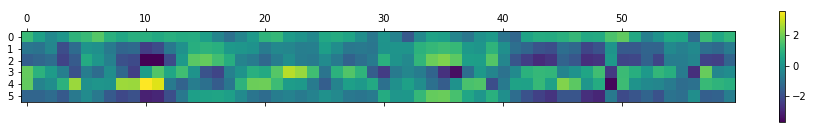

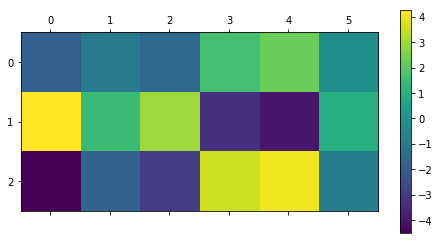

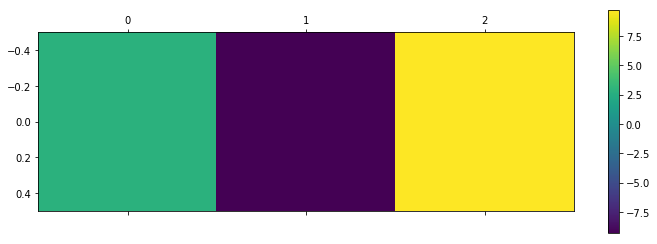

In [132]:
from matplotlib import cm

data1 = clf.coefs_[0].transpose()
plt.matshow(data1)
plt.colorbar()

data2 = clf.coefs_[1].transpose()
plt.matshow(data2)
plt.colorbar()


data3 = clf.coefs_[2].transpose()
plt.matshow(data3)
plt.colorbar()
